# 平滑化スプライン

\begin{align*}
    {\rm RSS} (f, \lambda) = \sum_{i=1}^N (y_i - f(x_i) )^2 + \lambda \int f^{\prime\prime}(t)^2 dt
\end{align*}

- $\lambda=0$: $f$ はデータを補間する任意の関数。
- $\lambda=\infty$: $f$ は最小二乗解。

\begin{align*}
\cfrac{\partial}{\partial a} \sum_{i=1}^N (y_i - a - bx_i)^2
=& - \sum_{i=1}^N 2(y_i - a - bx_i)
= 2aN - 2\sum_{i=1}^N (y_i - bx_i) \\
\cfrac{\partial}{\partial b} \sum_{i=1}^N (y_i - a - bx_i)^2
=& - \sum_{i=1}^N 2(y_i-a-bx_i)x_i
= 2b \sum_{i=1}^N x_i^2 - 2\sum_{i=1}^N (y_i - a)x_i \\
\therefore\qquad
a =& \cfrac{1}{N} \sum_{i=1}^N (y_i - b x_i)
= \bar{y} - b\bar{x} \\
b{\sum_{i=1}^N x_i^2} =& {\sum_{i=1}^N(y_i - a)x_i}
= {\sum_{i=1}^N \left(y_i - \bar{y} + b\bar{x}\right)x_i}
= {\sum_{i=1}^N x_iy_i - N\bar{x}\bar{y} + Nb\bar{x}^2} \\
\therefore\qquad
b =& \cfrac{N^{-1}\sum_{i=1}^Nx_iy_i - \bar{x}\bar{y}}{N^{-1}\sum_{i=1}^Nx_i^2 - \bar{x}^2}
= \cfrac{{\rm Cov}(x,y)}{\mathbb{V}[x]}
\end{align*}

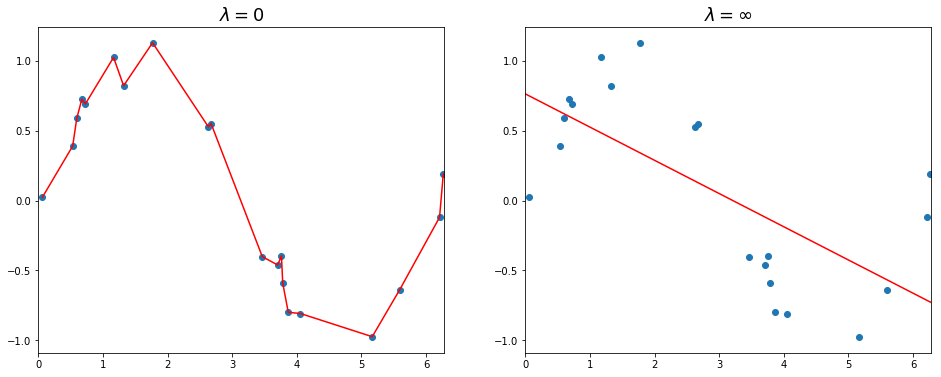

In [2]:
# case of lambda = 0 and lambda = infty 

import numpy as np;
import matplotlib.pyplot as plt;

# data creation
N = 20;
sigma = 0.1;
X = 2*np.pi*np.random.rand (N,1);
Y = np.sin (X) + sigma*np.random.normal (size=(N,1));

# lambda = 0
fig = plt.figure (figsize=(16,6));
ax = fig.add_subplot(121);
ax.scatter (X[:,0],Y[:,0]);
ax.set_xlim ([0, 2*np.pi]);
values = list(zip(X,Y));
data = np.array (values, dtype=[('a',float),('b',float)]);
sorted_data = np.sort (data, order=['a','b']);
sorted_X = [];
sorted_Y = [];
for sd in sorted_data:
    sorted_X.append (sd[0]);
    sorted_Y.append (sd[1]);
ax.plot (sorted_X[:], sorted_Y[:], 'r');
ax.set_title ("$\lambda=0$", fontsize=18)

# lambda = infty
ax = fig.add_subplot(122)
ax.scatter (X[:,0],Y[:,0]);
ax.set_xlim ([0, 2*np.pi]);
b = np.cov(X.T, Y.T)[0,1] / np.var (X);
a = np.mean(Y) - b*np.mean(X);
xs = np.linspace (0,2*np.pi);
ax.plot (xs, a+xs*b, 'r');
ax.set_title ("$\lambda=\infty$", fontsize=18);


\begin{align*}
    &N_1(x) = 1, N_2(x) = x, N_k(x) = d_{k-2}(x) - d_{N-1}(x) \quad (k \geq 3) \\
    &d_k (x) = \cfrac{(x - x_k)_+^3 - (x-x_{N})_+^3}{x_N - x_k}
    = \left\{
        \begin{matrix}
            0 & (x \leq x_k) \\
            \cfrac{(x-x_k)^3}{x_N-x_k} & (x_k < x < x_N) \\
            3x^2 - 3(x_N+x_k)x + (x_N^2+x_Nx_k + x_k^2) & (x_N \leq x)
        \end{matrix}
        \right. \\
    &d_{k-2} (x_j) = \left\{ \begin{matrix}
        0 & (j \leq k-2) \\
        \cfrac{(x_j - x_{k-2})^3}{x_N - x_{k-2}} & (j > k-2)
        \end{matrix} \right. \\
    &d_{N-1} (x_j) = \left\{\begin{matrix}
        0 & (j \leq N-1) \\
        (x_{N} - x_{N-1})^2 & (j = N)
        \end{matrix} \right. \\
    &N_k (x_j)
        = \left\{ \begin{matrix}
            0 & (j \leq k-2) \\
            \cfrac{(x_j-x_{k-2})^3}{x_N - x_{k-2}} & (k-2 \leq j \leq N-1) \\
            (x_N - x_{k-2})^2 - (x_N - x_{N-1})^2 & (j = N)
        \end{matrix} \right. (k \geq 3)
\end{align*}

\begin{align*}
    \mathbf{N}
    =& \left( \begin{matrix}
            N_1(x_1) & N_2(x_1) & N_3(x_1) & N_4(x_1) & \cdots & N_N(x_1) \\
            N_1(x_2) & N_2(x_2) & N_3(x_2) & N_4(x_2) & \cdots & N_N(x_2) \\
            N_1(x_3) & N_2(x_3) & N_3(x_3) & N_4(x_3) & \cdots & N_N(x_3) \\
            \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
            N_1(x_{N-1}) & N_2(x_{N-1}) & N_3(x_{N-1}) & N_4(x_{N-1}) & \cdots & N_N(x_{N-1}) \\
            N_1(x_N) & N_2(x_N) & N_3(x_N) & N_4(x_N) & \cdots & N_N(x_N)
        \end{matrix} \right) \\
    =& \left( \begin{matrix}
            1 & x_1 & 0 & 0 & \cdots & 0 \\
            1 & x_2 & \cfrac{(x_2-x_1)^3}{x_N-x_1} & 0 & \cdots & 0 \\
            1 & x_3 & \cfrac{(x_3-x_1)^3}{x_N-x_1} & \cfrac{(x_3-x_2)^3}{x_N-x_2} & \cdots & 0  \\
            \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
            1 & x_{N-1} & \cfrac{(x_{N-1}-x_1)^3}{x_N-x_1} & \cfrac{(x_{N-1}-x_2)^3}{x_N-x_2} & \cdots & \cfrac{(x_{N-1}-x_{N-2})^3}{x_N-x_{N-2}} \\
            1 & x_N & N_3(x_N) & N_4(x_N) & \cdots & N_N(x_N)
        \end{matrix}\right)
\end{align*}

\begin{align*}
    &N_1^{\prime\prime}(x) = 0,
    N_2^{\prime\prime}(x) = 0, \\
    &d_k^{\prime\prime}(x) = \left\{ \begin{matrix}
        0 & (x \leq x_k) \\
        \cfrac{6(x-x_k)}{x_N-x_k} & (x_k < x < x_N) \\
        6 & (x_N \leq x)
    \end{matrix} \right. \\
    & N^{\prime\prime}_k(x) 
        = d_{k-2}^{\prime\prime}(x) - d_{N-1}^{\prime\prime}(x)
        = \left\{ \begin{matrix}
                0 & (x \leq x_{k-2}, x_N \leq x) \\
                \cfrac{6(x-x_{k-2})}{x_N - x_{k-2}} & (x_{k-2} < x \leq x_{N-1}) \\
                \cfrac{6(x-x_{k-2})}{x_N-x_{k-2}} - \cfrac{6(x-x_{N-1})}{x_N-x_{N-1}} & (x_{N-1} < x < x_N)
            \end{matrix} \right.
\end{align*}



\begin{align*}
    \int N_j^{\prime\prime}(t) N_k^{\prime\prime}(t) dt =& \int N_k^{\prime\prime}(t) N_j^{\prime\prime} (t) dt = 0
        \qquad (j=1,2) \\
    \int N_j^{\prime\prime}(t)^2 dt 
        =& 36\int_{x_{j-2}}^{x_{N-1}} \cfrac{(t-x_{j-2})^2}{(x_N - x_{j-2})^2} dt 
            + 36\int_{x_{N-1}}^{x_N} \left\{\cfrac{t-x_{j-2}}{x_N-x_{j-2}} - \cfrac{t-x_{N-1}}{x_N-x_{N-1}} \right\}^2 dt \\
        =& 36\int_{x_{j-2}}^{x_N} \cfrac{(t-x_{j-2})^2}{(t_N-x_{j-2})^2} dt
            + 36 \int_{x_{N-1}}^{x_N} \left\{
                -\cfrac{2(t-x_{j-2})(t-x_{N-1})}{(x_N-x_{j-2})(x_N-x_{N-1})}
                +\cfrac{(t-x_{N-1})^2}{(x_N-x_{N-1})}
            \right\} dt \\
        =& 12 \left[\cfrac{(t-x_{j-2})^3}{(x_N - x_{j-2})^2} \right]_{x_{j-2}}^{x_N}
            - \cfrac{12}{(x_N-x_{j-2})(x_N-x_{N-1})} \left[2t^3 - 3(x_{j-2}+x_{N-1})t^2 + 6x_{j-2}x_{N-1}t \right]_{x_{N-1}}^{x_N}
            + 12 \left[\cfrac{(t-x_{N-1})^3}{(x_N-x_{N-1})^2} \right]_{x_{N-1}}^{x_N} \\
        =& 12(x_N - x_{j-2}) + 12(x_N - x_{N-1})
            - \cfrac{12}{x_N-x_{j-2}} \left\{
                2(x_N^2 + x_Nx_{N-1} + x_{N-1}^2)
                - 3(x_{j-2} + x_{N-1}) (x_N + x_{N-1})
                + 6x_{j-2} x_{N-1}
            \right\} \\
        =& 12(x_N - x_{j-2}) + 12(x_N - x_{N-1})
            - \cfrac{12}{x_N - x_{j-2}} \left\{
                2x_N^2 - x_{N-1}^2 - x_{N-1}x_N + 3x_{j-2}x_{N-1} - 3x_{j-2}x_N
            \right\} \\
        =& \cfrac{12}{x_N-x_{j-2}} \left\{
                (x_N^2 - 2x_{j-2}x_N + x_{j-2}^2)
                + (x_N^2 - 2x_{N-1}x_N + x_{N-1}^2)
                - (2x_N^2 - x_{N-1}^2 - x_{N-1}x_N + 3x_{j-2}x_{N-1} - 3x_{j-2}x_N)
            \right\} \\
        =& \cfrac{12}{x_N-x_{j-2}} \left\{
                x_{j-2}^2 + 2x_{N-1}^2
                - 3x_{j-2}x_{N-1} + x_{j-2}x_N - x_{N-1}x_N
            \right\} \\
        =& \cfrac{12}{x_N-x_{j-2}}
            (x_{j-2} - x_{N-1})(x_{j-2} - 2x_{N-1} + x_N)
\end{align*}


\begin{align*}
    \int N_j^{\prime\prime}(t) N_k^{\prime\prime} (t) dt
    =& 36\int_{x_{k-2}}^{x_{N-1}} \cfrac{(t-x_{j-2})(t-x_{k-2})}{(x_N-x_{j-2})(x_N-x_{k-2})} dt
        + 36\int_{x_{N-1}}^{x_N} 
            \left(\cfrac{t-x_{j-2}}{x_N-x_{j-2}} - \cfrac{t-x_{N-1}}{x_N-x_{N-1}}\right)
            \left(\cfrac{t-x_{k-2}}{x_N-x_{k-2}} - \cfrac{t-x_{N-1}}{x_N-x_{N-1}}\right)
            dt \\
    =& 36 \int_{x_{k-2}}^{x_N} \cfrac{(t-x_{j-2})(t-x_{k-2})}{(x_N-x_{j-2})(x_N-x_{k-2})} dt
        + 36 \int_{x_{N-1}}^{x_N} 
            \left\{
                - \left(\cfrac{2t-x_{j-2}-x_{k-2}}{2x_N-x_{j-2}-x_{k-2}}\right)\left( \cfrac{t-x_{N-1}}{x_N-x_{N-1}} \right)
                + \left(\cfrac{t-x_{N-1}}{x_N-x_{N-1}}\right)^2
            \right\} dt \\
    =& \cfrac{12}{(x_N-x_{j-2})(x_N-x_{k-2})} \left[ 2t^3 - 3(x_{j-2}+x_{k-2})t^2 + 6x_{j-2}x_{k-2}t \right]_{x_{k-2}}^{x_N}
        - \cfrac{12}{(2x_N-x_{j-2}-x_{k-2})(x_N-x_{N-1})} \left[ 4t^3 - 3(x_{j-2}+x_{k-2}+x_{N-1})t^2 + 6x_{N-1}(x_{j-2}+x_{k-2})t \right]_{x_{N-1}}^{x_N}
        + 12 \left[ \cfrac{(t-x_{N-1})^3}{(x_N-x_{N-1})^2} \right]_{x_{N-1}}^{x_N} \\
    =& \cfrac{12}{x_N-x_{j-2}} \left\{
            2(x_N^2+x_{k-2}x_N+x_{k-2}^2)
            -3 (x_{j-2}+x_{k-2})(x_N + x_{k-2})
            +6 x_{j-2}x_{k-2}
        \right\} 
        + 12 (x_N-x_{N-1})
        - \cfrac{12}{2x_N-x_{j-2}-x_{k-2}} \left\{
            4(x_N^2 + x_{N-1}x_N + x_{N-1}^2)
            -3(x_{j-2} + x_{k-2} + x_{N-1})(x_N + x_{N-1})
            +6x_{N-1}(x_{j-2}+x_{k-2})
        \right\}
        \quad(2 \leq j < k)
\end{align*}

In [4]:
import csv
import numpy as np;

# get data

file = open("../data/LAozone.csv", "r", encoding="utf_8", errors="", newline="" )
f = csv.reader(file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
header = next(f);
N = 128
train_data = np.array ([[float (x) for x in row[:]] for row in f]);
train_Y = train_data[0:-1,0];
train_X = train_data[0:-1,6];

K = len(np.unique(train_Y));
N, = train_X.shape;


import matplotlib.pyplot as plt;
import scipy.optimize as opt;

# sorting by ascending order
values = list(zip(train_X,train_Y));
data = np.array (values, dtype=[('a',float),('b',float)]);
sorted_data = np.sort (data, order=['a','b']);
sorted_X = [];
sorted_Y = [];
mx = -np.inf;
for sd in sorted_data:
    if (mx < sd[0]):
        sorted_X.append (sd[0]);
        sorted_Y.append (sd[1]);
        mx = sd[0];

dataX = np.array (sorted_X);
dataY = np.array (sorted_Y);

N, = dataX.shape;


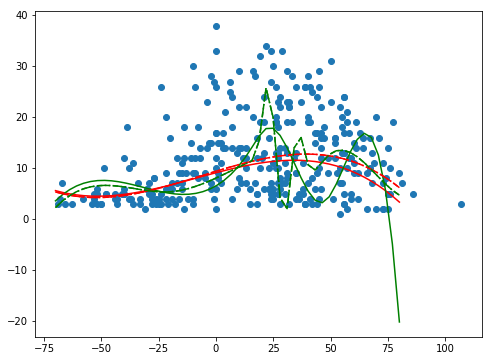

In [7]:
from scipy.interpolate import UnivariateSpline;

plt.figure (figsize=(8,6))
w = np.array ([0.05 if i%10==0 else 0 for i in range (N)])
w2 = np.array ([0.05 if i%5==0 else 0 for i in range (N)])
w3 = np.array ([0.5 if i%10==0 else 0.2 for i in range (N)])
plt.scatter(train_X[:], train_Y[:])
s_knot1 = UnivariateSpline (dataX, dataY, w=w, s=5.0);
s_knot2 = UnivariateSpline (dataX, dataY, w=w, s=1.0);
s2_knot1 = UnivariateSpline (dataX, dataY, w=w2, s=5.0);
s2_knot2 = UnivariateSpline (dataX, dataY, w=w2, s=1.0);
s3_knot1 = UnivariateSpline (dataX, dataY, w=w3, s=5.0);
s3_knot2 = UnivariateSpline (dataX, dataY, w=w3, s=1.0);
x = np.linspace (-70,80);
plt.plot (x,s_knot1(x), 'r')
plt.plot (x,s_knot2(x), 'g')
plt.plot (x,s2_knot1(x), 'r--')
plt.plot (x,s2_knot2(x), 'g--')
plt.plot (x,s2_knot1(x), 'r-.')
plt.plot (x,s2_knot2(x), 'g-.')

(0, 1)

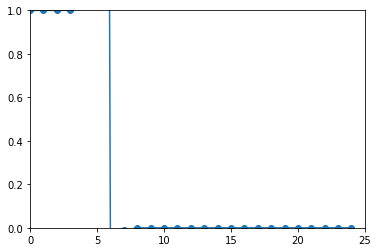

In [68]:
N = 25

def matrix_N (col, row):
    # param col means  column number
    # param row means  row number
    if row+1==1:
        return 1;
    if row+1==2:
        return dataX[col];
    if row+1>col+1+1:
        return 0;
    if col+1==N:
        return (dataX[N-1]-dataX[row-2])**2 - (dataX[N-1]-dataX[N-2])**2;
    return (dataX[col] - dataX[row-2])**3 / (dataX[N-1] - dataX[row-2]);

def matrix_Omega (col, row):
    # param col means column number
    # param row means row number
    if (col+1<=2) or (row+1<=2):
        return 0;
    if (col+1==row+1):
        return 12*(dataX[col-2]-dataX[N-2])*(dataX[col-2]-2*dataX[N-2]+dataX[N-1]) / (dataX[N-1]-dataX[col-2]);
    j = row if (row<col) else col;
    k = col if (row<col) else row;
    tmp1_1 = dataX[N-1]*dataX[N-1]+dataX[k-2]*dataX[N-1]+dataX[k-2]*dataX[k-2];
    tmp1_2 = (dataX[j-2]+dataX[k-2])*(dataX[N-1]+dataX[k-2]);
    tmp1_3 = dataX[j-2]*dataX[k-2];
    tmp2 = dataX[N-1] - dataX[N-2];
    tmp3_1 = dataX[N-1]*dataX[N-1]+dataX[N-1]*dataX[N-2]+dataX[N-2]*dataX[N-2];
    tmp3_2 = (dataX[j-2]+dataX[k-2]+dataX[N-2])*(dataX[N-1]+dataX[N-2]);
    tmp3_3 = dataX[N-2]*(dataX[j-2]+dataX[k-2]);
    tmp1 = (2*tmp1_1 - 3*tmp1_2 + 6*tmp1_3) / (dataX[N-1]-dataX[j-2]);
    tmp3 = (4*tmp3_1 - 3*tmp3_2 + 6*tmp3_3) / (2*dataX[N-1]-dataX[j-2]-dataX[k-2]);
    return 12*(tmp1 + tmp2 - tmp3);
    
    
# calcurating matrices
matN = np.zeros ((N,N)); 
for col in range(N):
    for row in range (N):
        matN[col,row] = matrix_N(col, row);

Omega = np.zeros ((N,N));
for col in range (N):
    for row in range(N):
        Omega[col,row] = matrix_Omega (col,row)

# print (matN)
# :print (Omega)
# lam = 0.00022;
u,s,vh = np.linalg.svd(matN, full_matrices=False);
K = (u.T/s).dot (vh.T).dot(Omega).dot (vh/s).dot (u);
# checking K is symmetric
for row in range (N):
    for col in range (row+1,N):
        if not np.isclose (K[row,col],K[col,row]):
            print ("{},{}".format(col, row))
w, v = np.linalg.eig (K);
rw = np.real (np.where (np.isreal (w), w, float('inf'))*w);
rpw = np.where (rw>=0, rw, float('inf'));
w = np.sort (rpw);
sol = opt.root (lambda l: (np.sum(1.0/(1+l*np.where(np.isinf(w), 0.0, w))-12.0)), 0.1)
lam = sol.x[0];
# print (lam)
plt.figure ();
plt.plot (1.0/(1+lam*w), 'o-')
plt.xlim ([0, 25]);
plt.ylim ([0,1])
# ll = np.linspace (0,1000.0, num=10000);
# ddf = np.zeros_like (ll)
# for idx in range (ll.shape[0]):
#     ddf[idx] = np.sum(1.0/(1+ll[idx]*np.where(np.isinf(w),0.0,w)))
# plt.plot (ll, ddf)

In [30]:
import numpy as np;

#  A = np.random.randn (3,2);
#  print (A)
#  u, s, vh = np.linalg.svd(A,full_matrices=False);
#  print (np.allclose (A, np.dot(u*s,vh)))
#  print ((u*s).dot(vh));
# a = np.array ([1,3,5,2,4])
# print (a);
# print (np.sort (a))
# print (np.argsort (a))
# print (np.sort (a)[::-1])
# print (np.argsort (a)[::-1])

print (not np.isclose (3.99,4));
print (np.positive (np.array ([-3, 2, -4, 5]) ))


True
[-3  2 -4  5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
